# 1.0 Project Overview
This project is about the Syrian Telecommunication company that was assessing the bevaiour of the customers to leave their services and move to another telecommunication company(competitor).This will mean customers will soon stop accessing their services such as calling,sms,etc and switch to another service provider.In this project therefore we will explore the available data to classify the customer into two classifiable predictions as: will soon stop using the telcos services and will retain the services of the the telcos.In the longrun we shall determine which features will contribute to the customer discontinuing(soon) services of Syriatel in favour of another telcomunication company.


### 1.1 Objetcives of the Project
1. Determine how long a customer will stay on the Syriatel services
2. Determinie the retention ration of customers by Syriatel
3. Determine possible strategies to retain customers on Syriatel

# 2.0 Business and Data Understanding

#### 2.1 Business Understanding
This project is about assessing why the Syriatel Telecom company is going to loose customers,very soon to anothr service provider within the industry.We shall therefore seek insight on why customers will leave Syriatel or for this matter any company within the industry to cross-over another network.We shall establish the customer trends across various services provided within the network and see what factors will lead the customer abandon the service of one company for the other.

In particular we shall seek to answer the following questions:

1. How long does it take the customers to stay with the Syriatel?

2. What is the rention ratio of customers by the Telcos?

3. What are the likely causes of customers to leave the Syriatel to another telcos?

4. What are the likely strategies to be deployed by the teclos to avoid soon losing customers?

5. What is the behaviour of the customer before soon leaving the Syriatel to another service customer?

### 2.2 Data Understanding
In this section we explore the data provided for this project applying Exploration Data Analysisis Techniques to determine how we shall utilise the data provided.

## 2.2.1 Importing Libraries

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.preprocessing import MinMaxScaler # to scale the numeric features
from scipy import stats

## 2.2.2 Import the provided data for the project

We shall load our csv file and see the characteristics of the data provided and identify the features required for this project.



In [280]:
data= pd.read_csv('bigml_59c28831336c6604c800002a.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# 2.3 Data preparations 
In this section we shall undertake data preparation to enable us conduct Exploratory Data Analysis and Modelling by;

(a). Determine any missing values in the data set

(b). Identify any duplicated rows and columns

(c). Identify any irreleant columns that may not be needed to conduct any analysis and therefore thye are of no value to us in conducting this modelling for Machine Learning.This will be achieved by dropping such columns

In [281]:
# checking for missing values
data.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No missing value in the data set

In [282]:
# Check for duplicates in the dataset
duplicates = data.duplicated().sum()
duplicates

0

No duplicates in the dataset

In [283]:
# Drop any irrelevant columns that will not be required or used in the analysis.In this case we shall drop the phone number column
data.drop(columns=['phone number'], inplace=True)
data.head(5)


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 2.4 Conducting Exploratory Data Analysis
In this section we shall explore the data to see the type of data we are dealing with,establish some relationships and visualise the data.


In [284]:
# checking the data types
data.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

The data contains both numeric data and categorical data:

1. Categorical data include; state,international plan and voice plan

2. Numeric data include; 
* number vmail message
* total day minutes        
* total day calls            
* total day charge          
* total eve minutes         
* total eve calls            
* total eve charge          
* total night minutes       
* total night calls           
* total night charge        
* total intl minutes       
* total intl calls            
* total intl charge         
* customer service calls 

3. We have data known as **churn** which is boolen in nature meaning that it either true or False.This may mean it will determine if the customer left the telcom company soon(Syriatel) or not.True will denote that the customer left the company and False will denote that the customer did not leave the service.

We can further analyise the churn data and create a list for numeric and categorical data as follows to enable us use the data better in our analysis going forward:

### (a) Creating numerical and categorical features or lists

In [285]:
# Creating a list of numeric features
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [286]:
# Creating a list of categorical  features
categorical_features = data.select_dtypes(exclude=[np.number]).columns.tolist()
categorical_features

['state', 'international plan', 'voice mail plan', 'churn']

We can further count the boolen entries in the churn  feature as follows;

In [287]:
# counting the boolean values in the churn data as 1 and 0
data['churn'].value_counts() # 1 means churn or the customer left the telcom  and 0 means not churn or the customer is still with the telecom


churn
False    2850
True      483
Name: count, dtype: int64

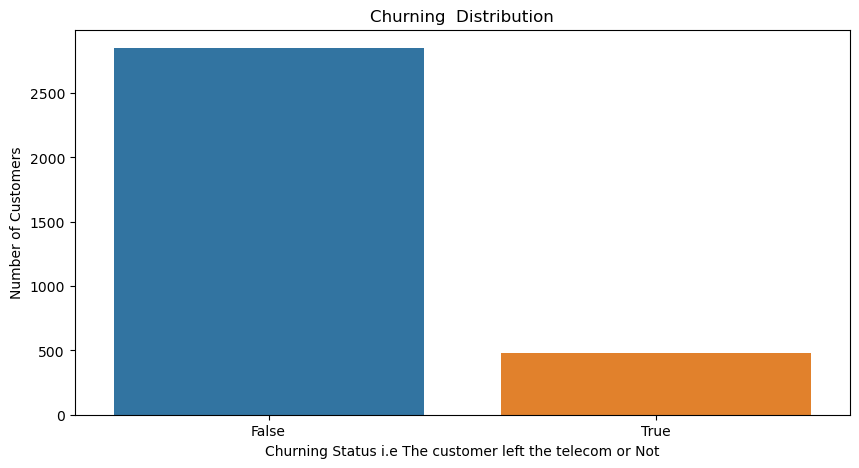

In [288]:
# Visualize the churned data on a histograph
plt.figure(figsize=(10, 5))
sns.countplot(x='churn', data=data);
plt.title('Churning  Distribution')
plt.xlabel('Churning Status i.e The customer left the telecom or Not')
plt.ylabel('Number of Customers')
plt.show()

From the above graph we can see that the data is imbalanced as the number of customers who churned is less than the number of customers who did not churn.i.e. the number of customers who left the telecom is less than the number of customers who are still with the telecom.

Those customers who left were 483 and those who remained were 2,850

In [289]:
# Identfying the unique values in the categorical features
for feature in categorical_features:
    print(f"{feature}: {data[feature].unique()}")


state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
international plan: ['no' 'yes']
voice mail plan: ['yes' 'no']
churn: [False  True]


In [290]:
# identifying the unique values in the numeric features
for feature in numeric_features:
    print(f"{feature}: {data[feature].unique()}")

account length: [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221]
area code: [415 408 510]
number vmail messages: [25 26  0 24 37 27 33 39 30 41 28 34 46 29 35 21 32 42 36 22 23 43 31 38
 4

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

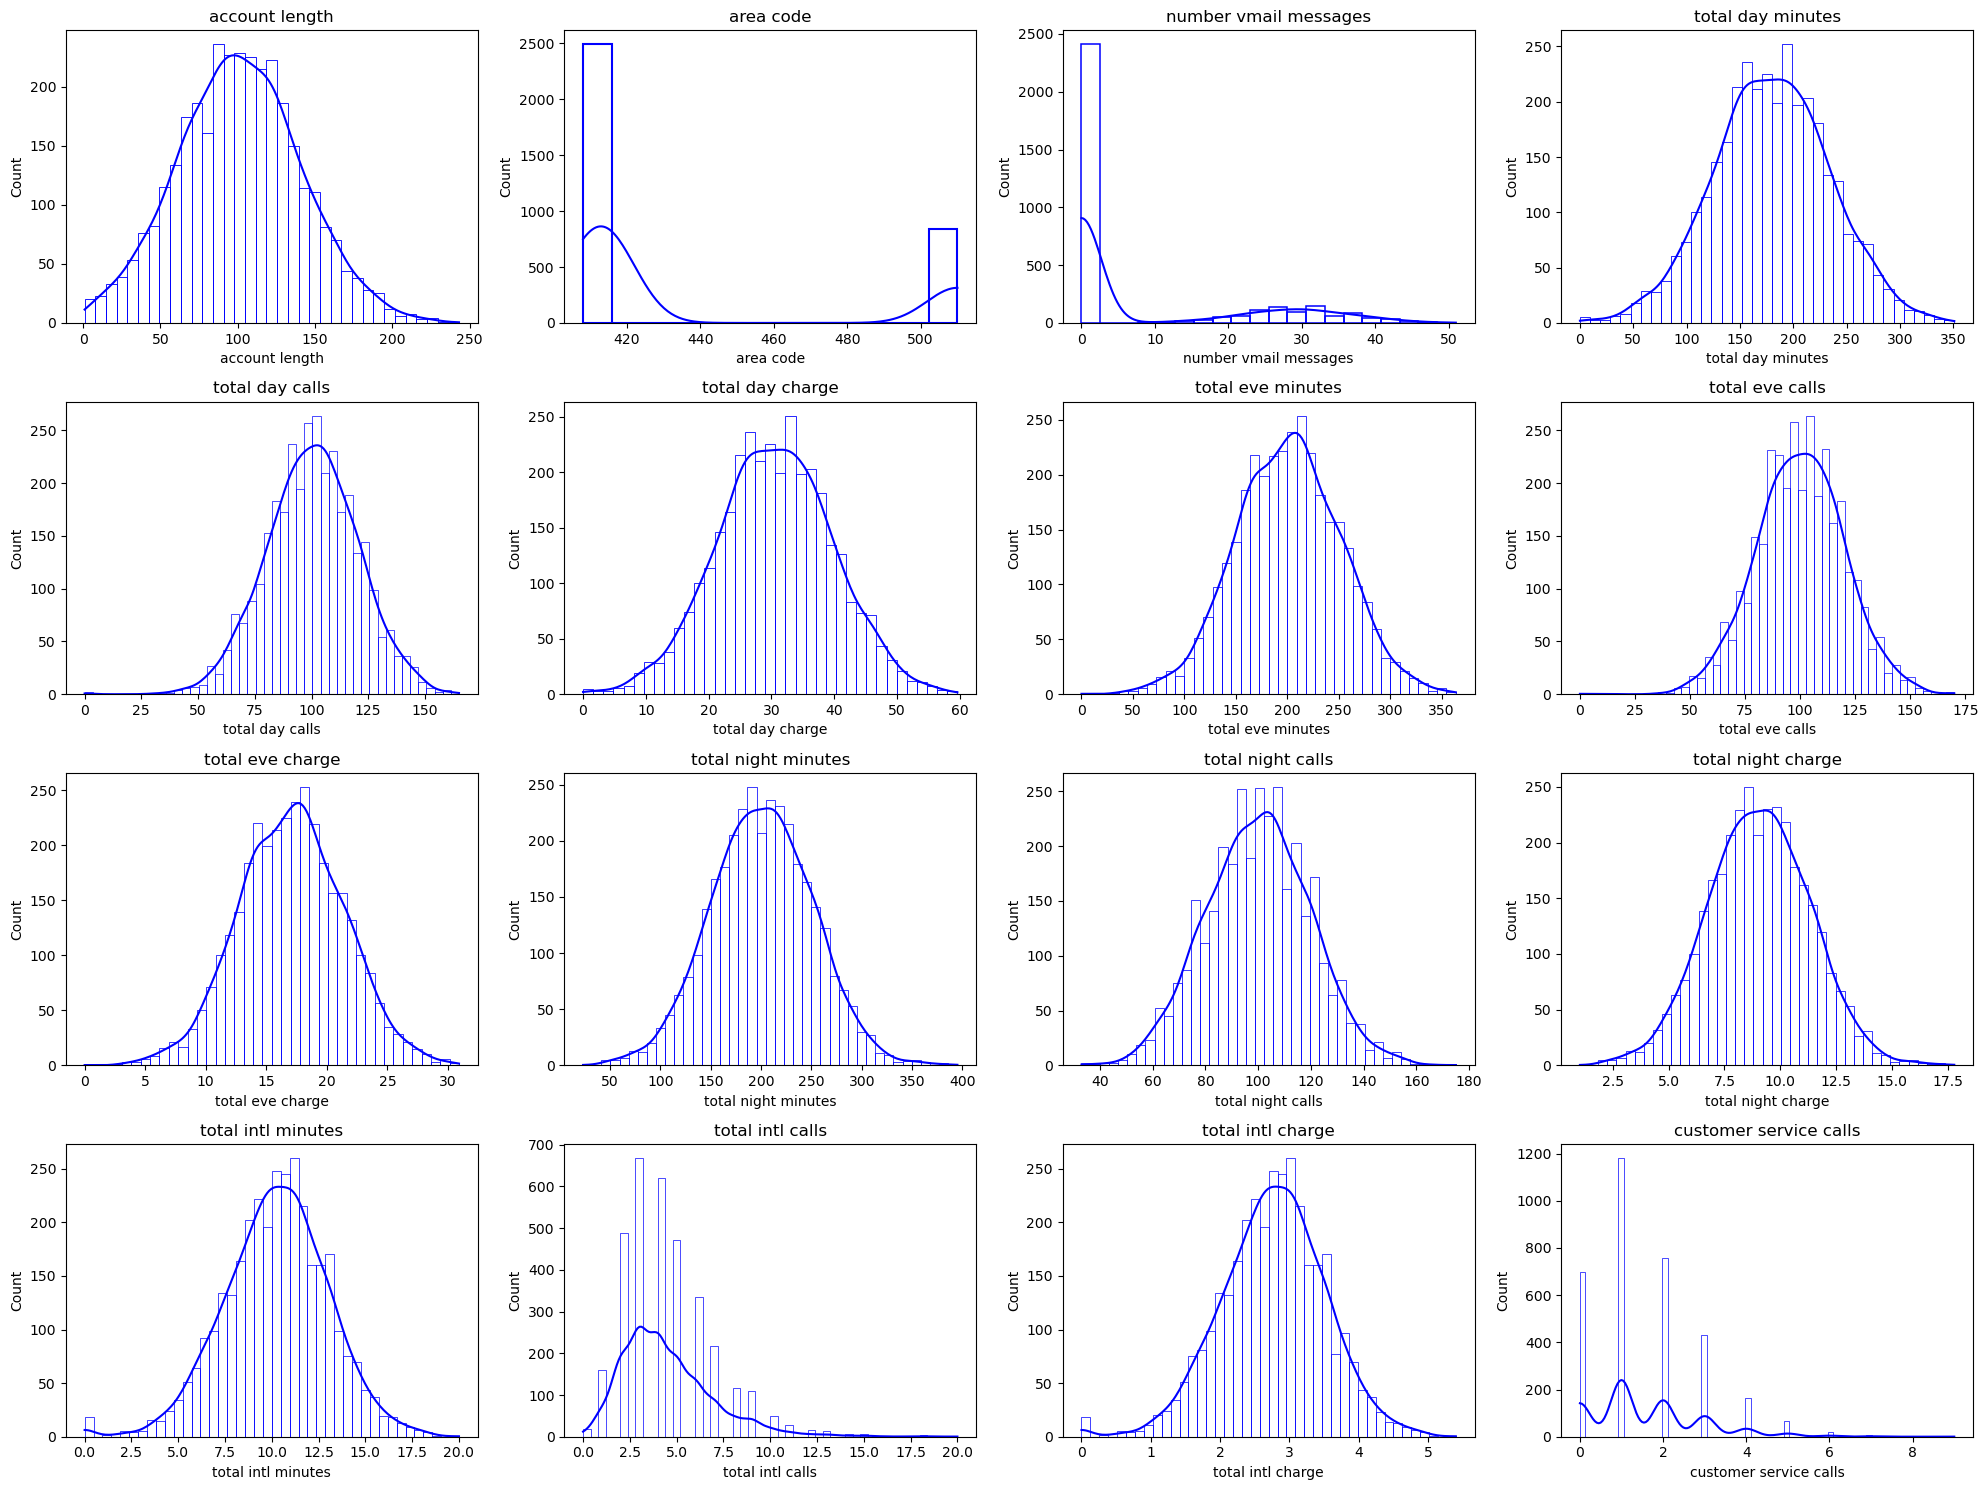

In [291]:

# checking the distribution of the numeric features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 4, i + 1)  # Adjusted to a 4x4 grid to fit all 13 features
    sns.histplot(data[feature], kde=True, fill=False, color='blue')  # Replaced 'palette' with 'blue'
    plt.title(feature)
plt.tight_layout()
plt.show()

#The area code,number of voice mail messages and cusomers service calls are not normally distributed.This means that we will need to scale the numeric features before we can use them in our model

# Identify Outliers in the Numeric Features of the Data

- Identifying the outliers will help us to undertstand the data better.

- It will explain any data points that are far away from the rest of the data points

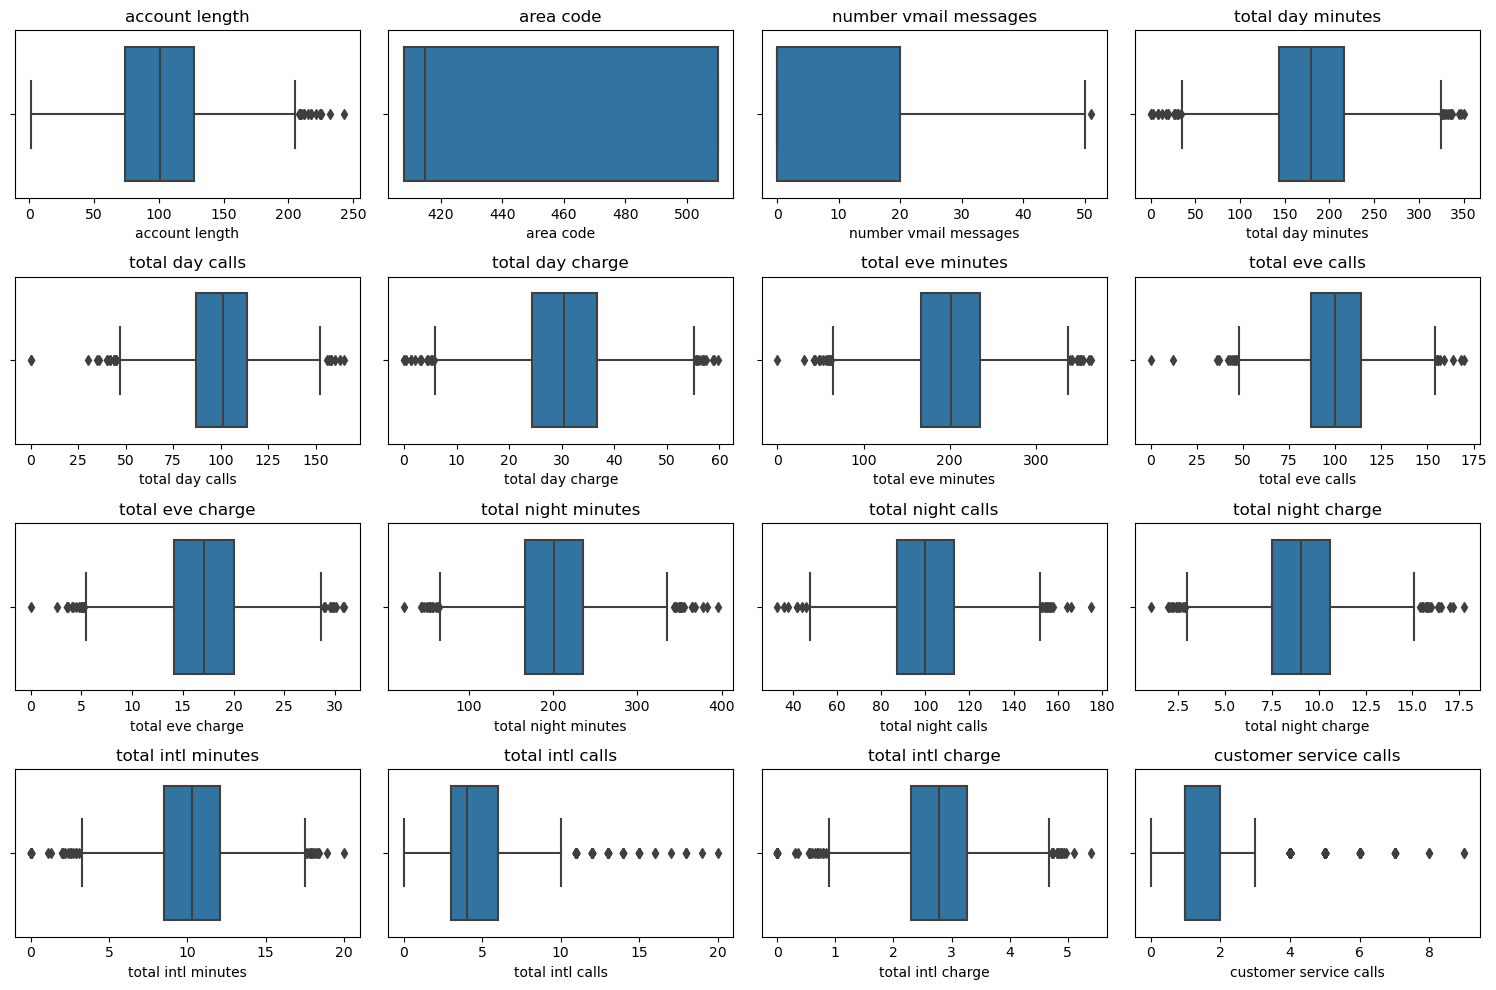

In [292]:
# Find out any outliers in the numeric features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 4, i + 1)  # Adjusted to a 4x4 grid to fit all 13 features
    sns.boxplot(x=data[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


 - Most of the numeric features have outliers except area code

- This means that the data is not normally distributed and therefore we may drop and reduce the data points that are an outlier  or replace their data with the mean or median

We can further anlysse the distribution nature of the numerical data as follows;


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

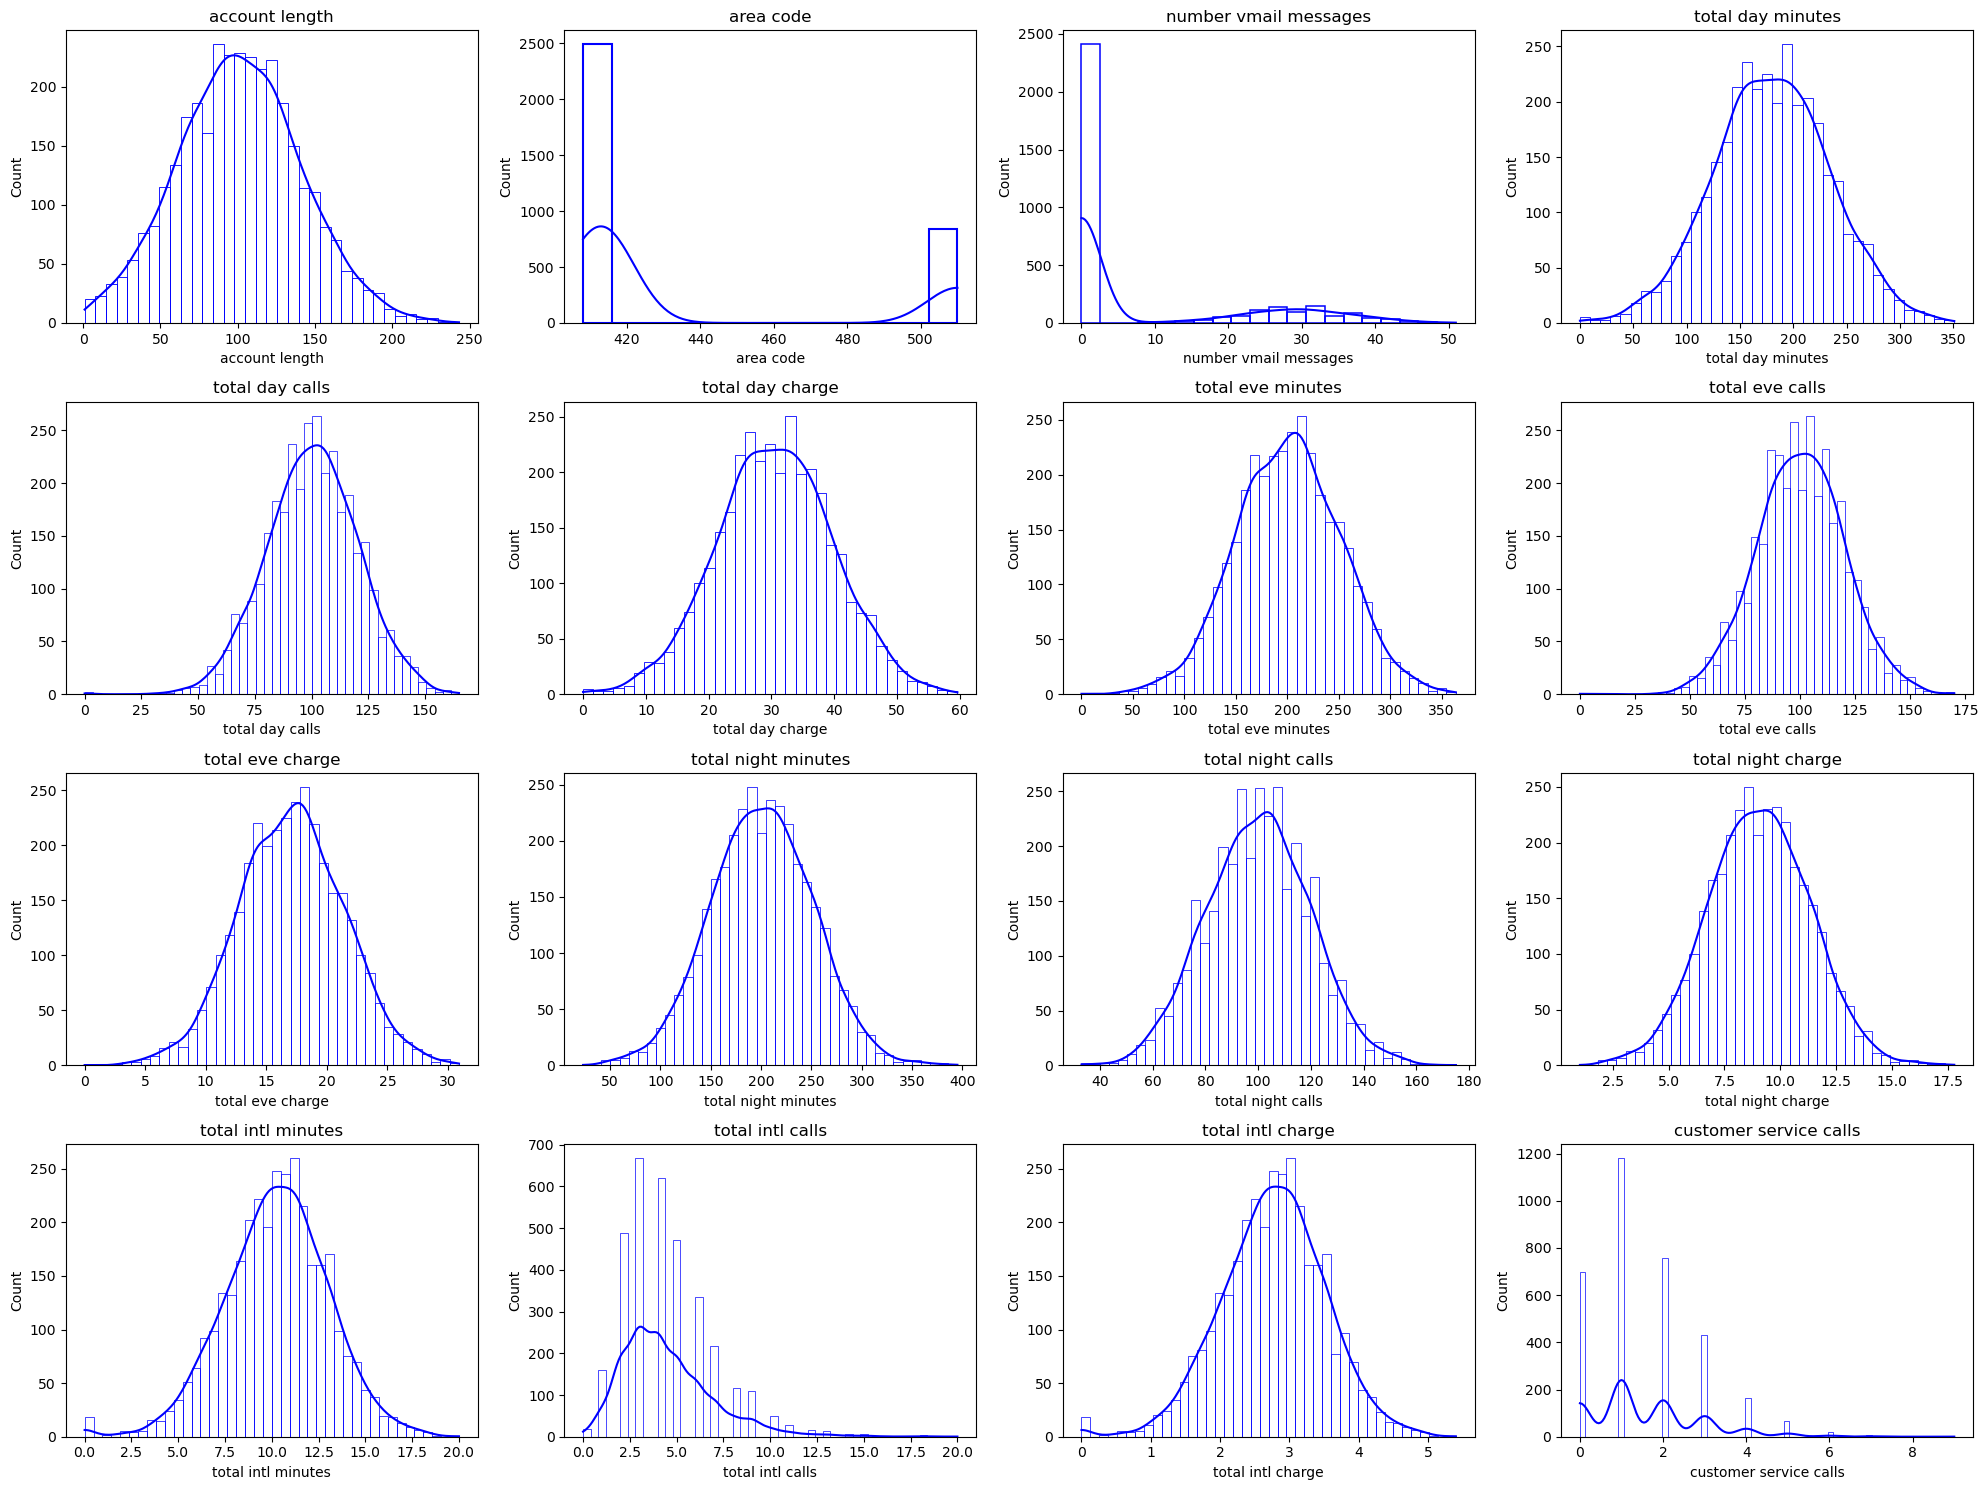

In [293]:
# distribution of numeric features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 4, i + 1)  # Adjusted to a 4x4 grid to fit all 13 features
    sns.histplot(data[feature], kde=True, fill=False, color='blue')  # Replaced 'palette' with 'blue'
    plt.title(feature)
plt.tight_layout()
plt.show()


- All  numeric features except customer service calls, have a normal distribution. 

- Total international calls seems to be skewed to the right side however it is still normally distributed. 

- Customer service calls has a few peaks, which indicates there are a few modes in the population. This is so because customer service calls has to be a integer and not a float number. 

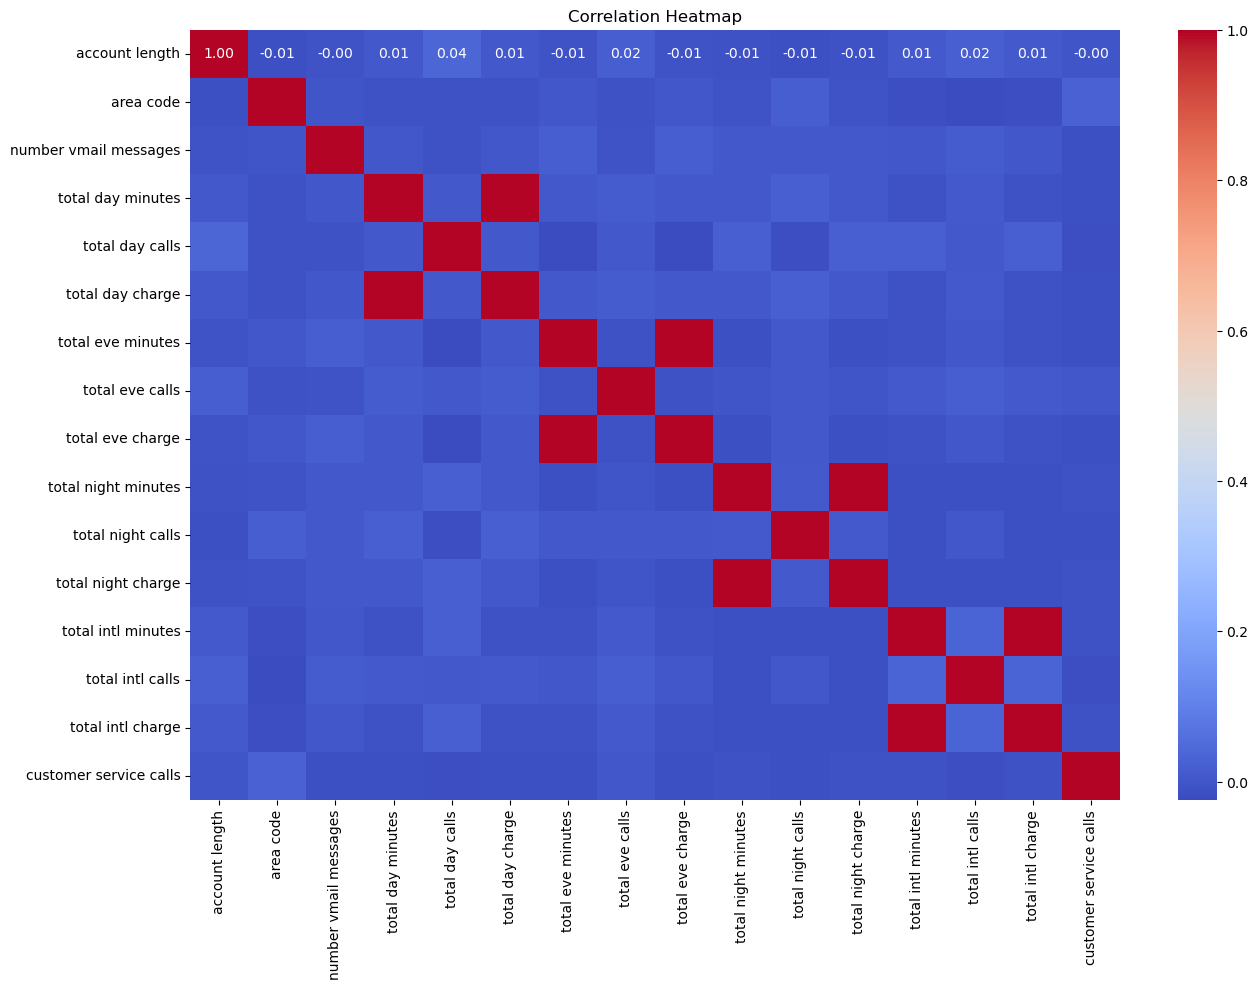

In [294]:
# Creating a heatmap to show the correlation between the numeric features
plt.figure(figsize=(15, 10))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [295]:
# We can check for the skewness of the numeric features
skewness = data[numeric_features].skew()
skewness = skewness[abs(skewness) > 0.5]  # Filter for skewed features
print("Skewed Features:")
print(skewness)


Skewed Features:
area code                 1.126823
number vmail messages     1.264824
total intl calls          1.321478
customer service calls    1.091359
dtype: float64


# Dealing with Outliers in the numerical features


In [302]:
# We can deal with outliers of the numeric features by using the z-score method
z_scores = np.abs(stats.zscore(data[numeric_features]))
threshold = 3
outliers = np.where(z_scores > threshold)
print("Outliers detected at indices:")
print(outliers)





Outliers detected at indices:
(array([  22,   32,   32,   41,   58,  115,  115,  179,  179,  182,  185,
        219,  244,  244,  272,  301,  314,  314,  329,  332,  343,  343,
        365,  365,  377,  416,  468,  474,  483,  488,  488,  493,  504,
        514,  522,  533,  533,  542,  595,  595,  636,  642,  646,  674,
        692,  694,  712,  712,  721,  740,  756,  762,  762,  778,  817,
        821,  821,  837,  845,  854,  863,  878,  878,  883,  883,  883,
        889,  889,  902,  908,  921,  922,  922,  957,  960,  974,  982,
        985,  985, 1021, 1028, 1028, 1052, 1052, 1080, 1080, 1092, 1113,
       1113, 1121, 1142, 1144, 1179, 1233, 1233, 1260, 1260, 1273, 1317,
       1317, 1325, 1333, 1345, 1345, 1345, 1355, 1392, 1397, 1397, 1397,
       1400, 1400, 1407, 1408, 1419, 1445, 1445, 1502, 1551, 1564, 1564,
       1567, 1615, 1638, 1694, 1751, 1831, 1865, 1886, 1889, 1912, 1919,
       1986, 1986, 1989, 2001, 2212, 2223, 2269, 2288, 2321, 2321, 2327,
       2331, 2331, 2

In [297]:
# We can drop the outliers from the dataset
data_cleaned = data[(z_scores < threshold).all(axis=1)]
print("Shape of cleaned data:", data_cleaned.shape)
print("Shape of original data:", data.shape)


Shape of cleaned data: (3169, 20)
Shape of original data: (3333, 20)


In [311]:
print("The original dataframe has {} columns.".format(data.shape[1]))
# Calculate the correlation matrix and take the absolute value
corr_matrix =(data[numeric_features]).corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

reduced_data = data.drop(to_drop, axis=1) # Drop the features
print("The reduced dataframe has {} columns.".format(reduced_data.shape[1]))

The original dataframe has 20 columns.
The reduced dataframe has 16 columns.


In [312]:
reduced_data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

# Transfrom the 'churn' from False and True to 0s and 1's

In [313]:
reduced_data['churn'] = reduced_data['churn'].map({True: 1, False: 0}).astype('int') 
reduced_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,OH,107,415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,NJ,137,415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,OH,84,408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,OK,75,415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0


## Categorical Features Analysis
We review and analyse the categorical features

In [304]:
# List of categorical features
categorical_features = ['state', 'area code', 'international plan', 'voice mail plan']
categorical_features

['state', 'area code', 'international plan', 'voice mail plan']

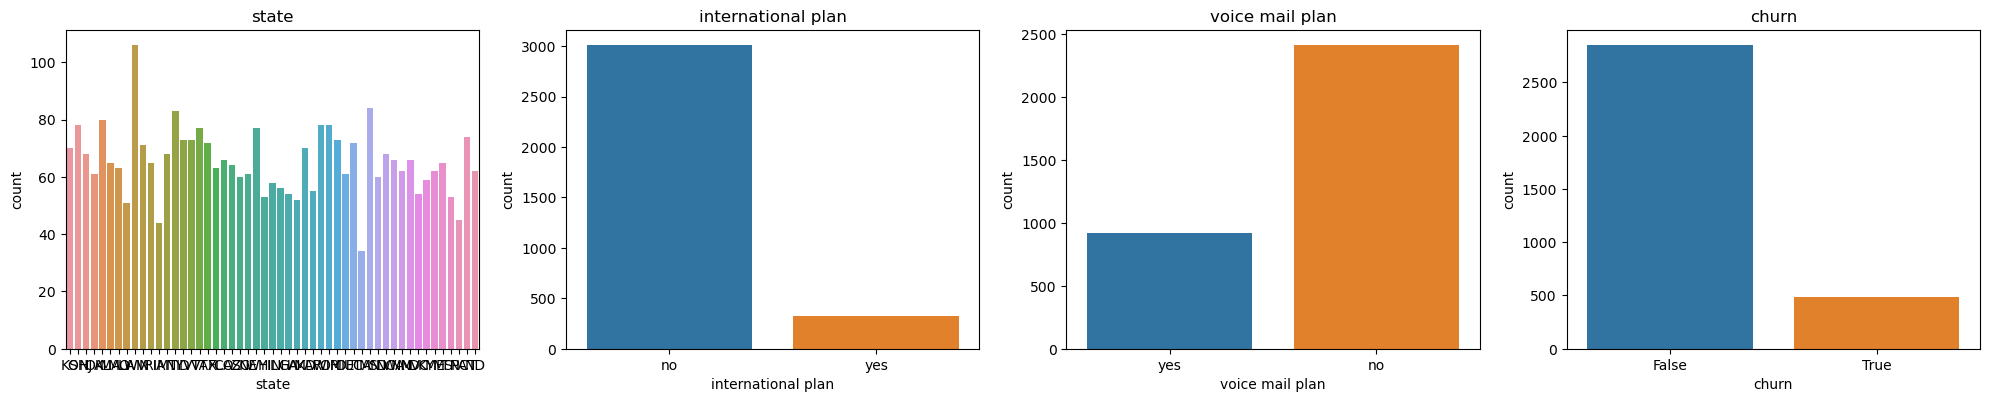

In [298]:
# checking the distribution of the categorical features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 4, i + 1)  # Adjusted to a 4x4 grid to fit all 13 features
    sns.countplot(x=feature, data=data,)
    plt.title(feature)
plt.tight_layout()
plt.show()

#From the above we can see that the categorical features have imbalanced data.This means that the data is not evenly distributed across the different categories. This can lead to biased results in machine learning models, as the model may be more likely to predict the majority class.This will be corrected later in the analysis by using the SMOTE technique to oversample the minority class and undersample the majority class.

In [299]:
# the Analysis of Area code 
# checking the distribution of the area code
Area_code = data['area code'].value_counts()
Area_code

area code
415    1655
510     840
408     838
Name: count, dtype: int64

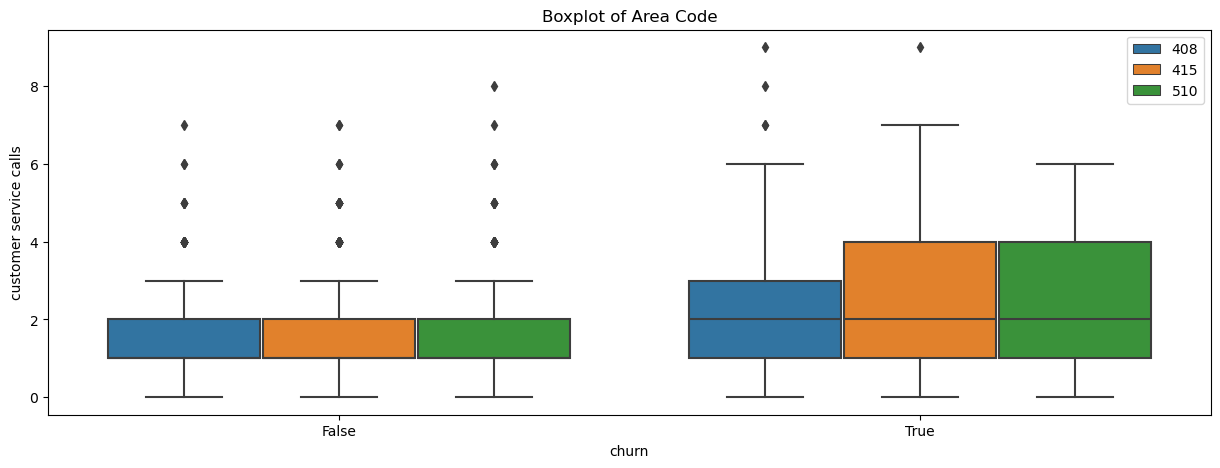

In [300]:
# Assess the boxplot to identify the outliers in the area code
plt.figure(figsize=(15, 5))
sns.boxplot(x=data['churn'], y=data['customer service calls'], hue=data['area code']) 
plt.title('Boxplot of Area Code')
plt.xlabel('churn')
plt.ylabel('customer service calls')
plt.legend(loc='upper right');
plt.show()


* There are outliers, in all area codes, amongst the customers who have not terminated their accounts ie not left Syriatell.

* The customers who have terminated  their account with Syriatel are in area code 415 and 510.,

# OneHot Encoding for categorical data

We shall transform the categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [ ]:
# Onehot Encoding for categorical features
dummy_data = pd.get_dummies(reduced_data, columns=categorical_features, drop_first=True)
dummy_data.head()





,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,...,False,False,False,False,False,False,True,False,False,True
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,...,False,False,False,False,False,False,True,False,False,True
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,...,False,False,False,False,False,False,True,False,False,False
3,84,0,71,50.90,88,5.26,89,8.86,7,1.78,...,False,False,False,False,False,False,False,False,True,False
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,...,False,False,False,False,False,False,True,False,True,False


## Scaling the Numerical Features


In [316]:
# scaling numerical features
Transformer = MinMaxScaler()

# Filter numeric_features to include only columns present in dummy_data
numeric_features = [feature for feature in numeric_features if feature in dummy_data.columns]

# Fit the transformer to the data
Transformer.fit(dummy_data[numeric_features])
# Transform the data
scaled_data = Transformer.transform(dummy_data[numeric_features])
# Convert the transformed data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=numeric_features)
# Concatenate the scaled data with the remaining columns in dummy_data
dummy_data = pd.concat([scaled_data, dummy_data.drop(columns=numeric_features)], axis=1)
dummy_data.head()


,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,0.524793,0.490196,0.666667,0.755701,0.582353,0.542866,0.408451,0.595935,0.15,0.500000,...,False,False,False,False,False,False,True,False,False,True
1,0.438017,0.509804,0.745455,0.460597,0.605882,0.537690,0.492958,0.622236,0.15,0.685185,...,False,False,False,False,False,False,True,False,False,True
2,0.561983,0.000000,0.690909,0.693830,0.647059,0.333225,0.500000,0.375374,0.25,0.609259,...,False,False,False,False,False,False,True,False,False,False
3,0.342975,0.000000,0.430303,0.853454,0.517647,0.170171,0.394366,0.467424,0.35,0.329630,...,False,False,False,False,False,False,False,False,True,False
4,0.305785,0.000000,0.684848,0.475184,0.717647,0.407959,0.619718,0.440526,0.15,0.505556,...,False,False,False,False,False,False,True,False,True,False


# 3.0 Modelling


Since this is a classifcation of binary data,we shall use two claffiers ie the logistic model and decision tree classification



In [343]:
#  basemodeling using logistic regression for numeric features

# Logistic Regression model
X = dummy_data.drop('churn', axis=1)
y = dummy_data['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # splitting the data into training and testing sets at 80% and 20%
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
# Model evaluation
print("Logistic Regression Model Evaluation:")








Logistic Regression Model Evaluation:


### 4.0 Model Evaluation

    # 4.1 Logistic Regression Model Evaluation

In [324]:
# Predicting the test set results
y_pred = log_reg.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)
# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)



Accuracy: 0.8530734632683659
F1 Score: 0.25757575757575757
Recall: 0.16831683168316833
Precision: 0.5483870967741935


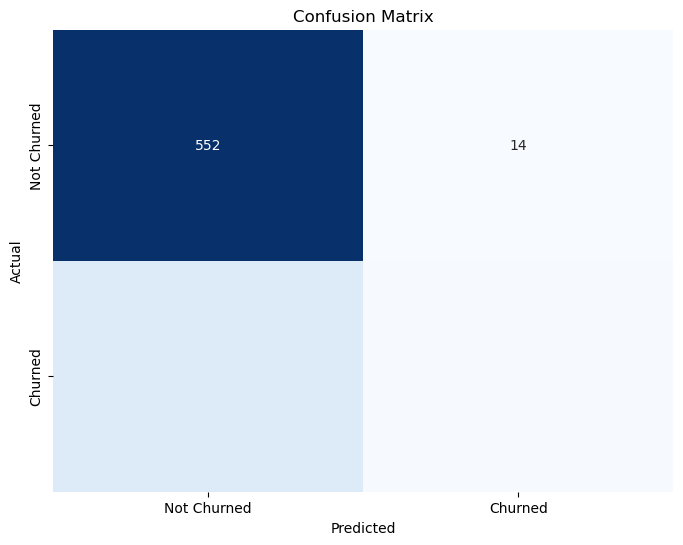

In [327]:
# confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [328]:
# classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned']))



Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.87      0.98      0.92       566
     Churned       0.55      0.17      0.26       101

    accuracy                           0.85       667
   macro avg       0.71      0.57      0.59       667
weighted avg       0.82      0.85      0.82       667



# From the above classification report we can see that the model is not performing well:
1. The accuracy is 0.85, which is not very high.This means that the model is not able to predict the churned customers accurately.

2. The F1 score is 0.26, which is also not very high. This means that the model is not able to balance precision and recall well.
3.  The recall is 0.17, which means that the model is able to identify 17% of the churned customers correctly.

4. The precision is 0.55, which means that the model is able to identify 55% of the non-churned customers correctly.

5. The confusion matrix shows that the model is making a lot of false positives and false negatives.

6. The classification report shows that the model is not able to predict the churned customers accurately.

7. The model is not performing well, and we need to improve it.


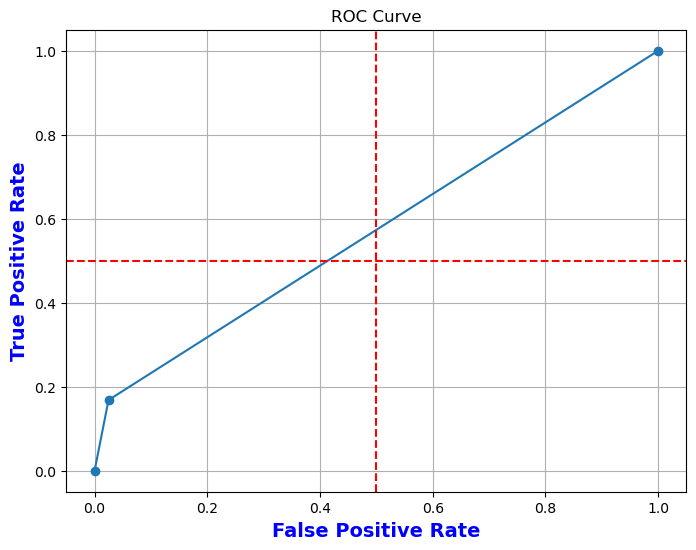

In [329]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', color='blue')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.grid()
plt.show()


In [330]:
# AUC 
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)


AUC: 0.5717909246755064


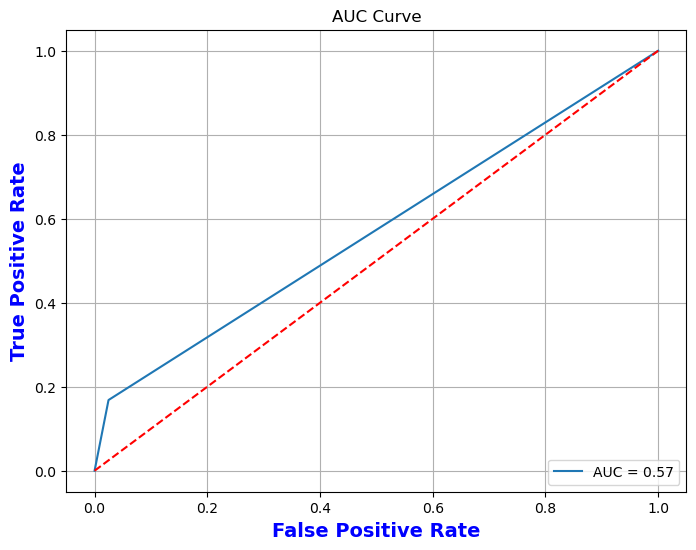

In [331]:
# AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='AUC = %.2f' % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('AUC Curve')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', color='blue')
plt.legend(loc='lower right')
plt.grid()
plt.show()



### 4.2 Decision Tree


In [ ]:

# Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Model evaluation
print("Decision Tree Classifier Model Evaluation:")

# Predicting the test set results
y_pred_dt = dt_classifier.predict(X_test)
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))







Decision Tree Classifier Model Evaluation:
Accuracy: 0.9250374812593704
F1 Score: 0.75
Recall: 0.7425742574257426
Precision: 0.7575757575757576


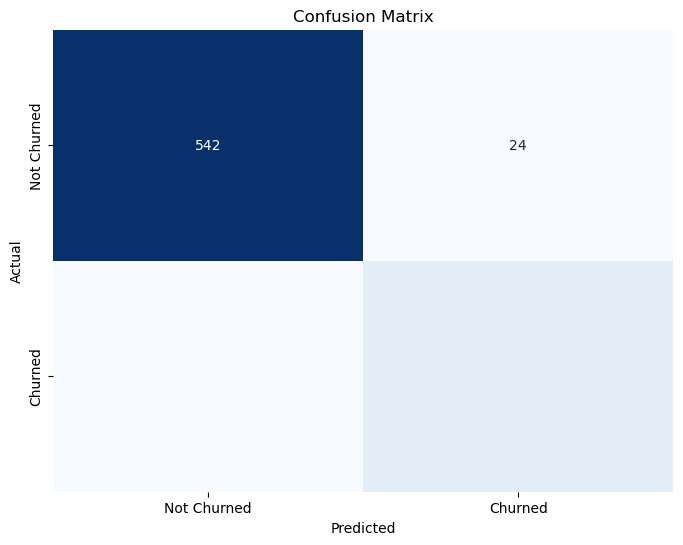

In [337]:
# confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [338]:
# classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Not Churned', 'Churned']))



Classification Report:
              precision    recall  f1-score   support

 Not Churned       0.95      0.96      0.96       566
     Churned       0.76      0.74      0.75       101

    accuracy                           0.93       667
   macro avg       0.86      0.85      0.85       667
weighted avg       0.92      0.93      0.92       667



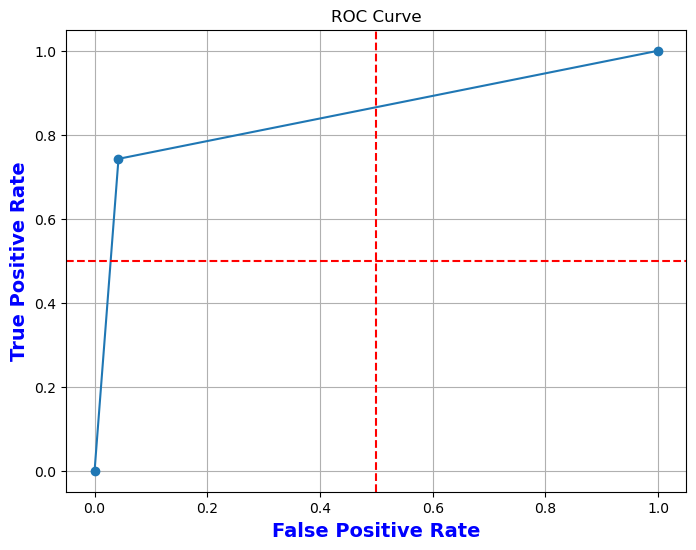

In [339]:
#ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, marker='o')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', color='blue')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.grid()
plt.show()


AUC: 0.8500857152853095


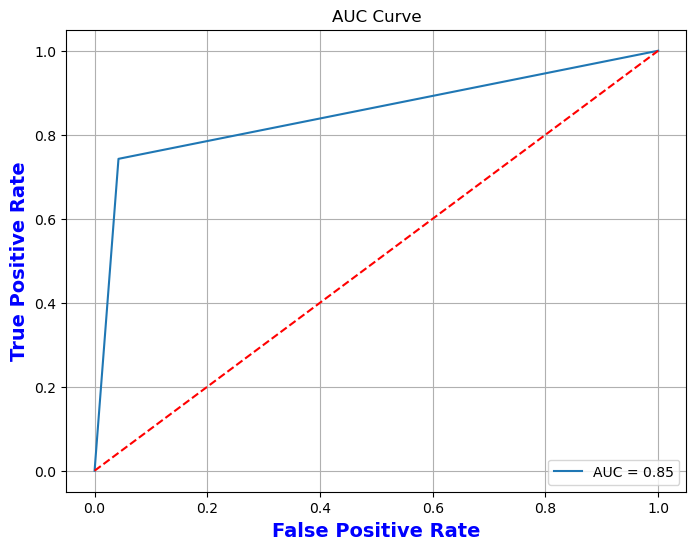

In [340]:
# AUC curve
auc_dt = roc_auc_score(y_test, y_pred_dt)
print("AUC:", auc_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='AUC = %.2f' % auc_dt)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('AUC Curve')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold', color='blue')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold', color='blue')
plt.legend(loc='lower right')
plt.grid()
plt.show()



# 5.0 Conclusion